In [1]:
import numpy as np
import numpy.matlib
import pickle
import matplotlib.pyplot as plt
import scipy.linalg as sl
import time
import pathlib
import nbimporter  # I installed it for importing an .ipynb file into another .ipynb like the pilot_assignemnt

import pilot_assignment
import APLocation_Generation
import functionRlocalscattering
#------------------------------
#import Power_optimizers

import os

from datetime import datetime

from scipy.optimize import minimize
from scipy.optimize import differential_evolution
import numpy.linalg as l 


import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import cifar100
import numpy as np
import matplotlib.pyplot as plt
import math

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
import time
import numpy.linalg as nl 


import tensorflow.keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as Kr
from tensorflow.keras import initializers

import pandas as pd
import random
import cv2
import os
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score


from tensorflow import expand_dims
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input, Lambda
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


from __future__ import print_function
import keras
import tensorflow.keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras import initializers

from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.utils import np_utils 

import time

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist

C:\Users\afmb\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\afmb\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\afmb\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [22]:
# Example modification (ensure paths are correct)
import json
import os

def process_data(raw_data_dir, output_json_dir):
    # Ensure the output directory exists
    if not os.path.exists(output_json_dir):
        os.makedirs(output_json_dir)
    
    # Process each file in the raw data directory
    for file_name in os.listdir(raw_data_dir):
        if file_name.endswith('.csv'):  # Assuming raw data is in CSV format
            file_path = os.path.join(raw_data_dir, file_name)
            with open(file_path, 'r') as file:
                # Add your processing logic here
                data = process_csv(file)  # Example function, replace with actual processing
                
                # Save the processed data
                output_file_path = os.path.join(output_json_dir, file_name.replace('.csv', '.json'))
                with open(output_file_path, 'w') as json_file:
                    json.dump(data, json_file)

# Define paths
data_dir = r'C:\Users\afmb\Downloads\leaf-master\data\femnist\preprocess'
raw_data_dir = data_dir
output_json_dir = r'C:\Users\afmb\Downloads\leaf-master\data\femnist\output data'

# Call the processing function
process_data(raw_data_dir, output_json_dir)


In [15]:
data_dir = r'C:\Users\afmb\Downloads\leaf-master\data\femnist\preprocess\data_to_json.py'

In [23]:
import os

# Check the contents of the output directory
json_files = [f for f in os.listdir(output_json_dir) if f.endswith('.json')]
print("JSON files created:", json_files)


JSON files created: []


In [24]:
import os

# List files in the raw data directory
raw_data_files = os.listdir(raw_data_dir)
print("Files in raw data directory:", raw_data_files)


Files in raw data directory: ['data_to_json.py', 'data_to_json.sh', 'get_data.sh', 'get_file_dirs.py', 'get_hashes.py', 'group_by_writer.py', 'match_hashes.py']


In [2]:
import numpy as np

def uniform_quantization(x, b):
    """
    Perform uniform quantization on the non-negative input data x with b bits.

    Parameters:
    x (numpy array): Non-negative input data to be quantized
    b (int): Number of bits for quantization

    Returns:
    numpy array: Quantized data
    """
    
    x_max = np.max(np.abs(x))
    x_min = np.min(np.abs(x))
    R = x_max - x_min
    # Number of quantization levels
    L = 2 ** b

    # Quantization step size
    delta = R / (L-1)

    x_clipped = np.clip(x, x_min, x_max)  # Ensure values are within [x_min, x_max]
    quantized = np.round((x_clipped - x_min) / delta) * delta + x_min

    return quantized
#-----------------------------------------------------------------------------
def adaptive_signQuant_lambda(main_vector, dim, lambda_j, b_j):
    mynum = 0
    l_norm = np.linalg.norm(main_vector, ord=np.inf)
    
    # Normalize each element of the vector 
    normalized_x = np.abs(main_vector) / l_norm

    # Identify the indices where the normalized value is greater than or equal to lambda
    indices = np.where(normalized_x >= lambda_j)[0]
    non_indices = np.where(normalized_x < lambda_j)[0]

    # Count the number of positive and negative elements among these indices
    positive_elements = main_vector[indices] > 0
    negative_elements = main_vector[indices] < 0

    n_max = np.sum(positive_elements)
    n_min = np.sum(negative_elements)

    x = np.copy(main_vector)
    x_q = mynum*np.ones_like(x)#*np.sign(x)
    x_q_temp = np.zeros_like(x)

    # Quantize values where normalized_x >= lambda_j
    for i in indices:
        x_q_temp[i] = np.abs(x[i])
    x_q0 = uniform_quantization(x_q_temp, b_j)
    for i in indices:
        x_q[i] = np.sign(x[i]) * x_q0[i]

    if n_max > 0:
        largest_values_indices = np.argsort(x_q)[-n_max:]
        largest_values = x_q[largest_values_indices]
    else:
        largest_values_indices = np.array([], dtype=int)
        largest_values = np.array([], dtype=x_q.dtype)

    # Find the n_min smallest values and their indices
    if n_min > 0:
        smallest_values_indices = np.argsort(x_q)[:n_min]
        smallest_values = x_q[smallest_values_indices]
    else:
        smallest_values_indices = np.array([], dtype=int)
        smallest_values = np.array([], dtype=x_q.dtype)

    if largest_values.size > 0:
        x_max = np.min(largest_values)
    else:
        x_max = 0

    if smallest_values.size > 0:
        x_min = np.max(smallest_values)
    else:
        x_min = 0
    
    if np.abs(x_min) > 0 and x_max > 0:
        x_min_me = min(x_max, np.abs(x_min))
    else:
        x_min_me = max(x_max,0, np.abs(x_min))
    
    if x_min_me <  1e-10:
        x_min_me =  0.0001
    
    for i in range(len(main_vector)):
        if x_q[i] ==mynum:
            x_q[i] = (np.sign(x[i]) == 1)*x_min_me/2 - (np.sign(x[i]) == -1)*x_min_me/2
    
    x_quant = x_q
    err = main_vector - x_quant
    
    # Return the results
    return x_q, x_max, x_min, err, n_max, n_min, x_min_me 



In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import fashion_mnist


# Define the number of clients and local epochs
K = 20

num_clients= K
#local_epochs = 1
local_epochs0 = 5 #local_epochs FedAvg
local_epochs = 5
epoch_increase = 0
b_j = 10
Lambda = 0.2**np.ones(K)

k_0 = -100 #num_global_iterations +1




# Load and preprocess the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Convert grayscale to RGB
x_train = np.expand_dims(x_train, axis=-1)  # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)    # Add channel dimension
x_train = np.repeat(x_train, 3, axis=-1)    # Convert grayscale to RGB
x_test = np.repeat(x_test, 3, axis=-1)      # Convert grayscale to RGB

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define neural network architecture
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model


# Federated Averaging algorithm parameters
num_global_iterations = 100
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.1)

# Split the data into non-overlapping portions for each client
client_data = []
samples_per_client = len(x_train) // num_clients
for i in range(num_clients):
    start = i * samples_per_client
    end = (i + 1) * samples_per_client
    x_client = x_train[start:end]
    y_client = y_train[start:end]
    client_data.append((x_client, y_client))

# Initialize the global model
global_model = create_model()
global_model.compile(optimizer=optimizer,
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

global_model_FedAvg = create_model()
global_model_FedAvg.compile(optimizer=optimizer,
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

global_weights = global_model.get_weights()

# Initialize lists for tracking metrics
global_acc_list = []
global_loss_list = []

global_acc_list_FedAvg = []
global_loss_list_FedAvg = []

# Evaluate the global model before FedAvg
initial_loss, initial_accuracy = global_model.evaluate(x_test, y_test)
print(f'Initial Test Loss: {initial_loss:.4f}')
print(f'Initial Test Accuracy: {initial_accuracy:.4f}')

global_acc_list_FedAvg.append(initial_accuracy)
global_acc_list.append(initial_accuracy)

global_model.summary()

313/313 [==============================] - 1s 4ms/step - loss: 2.2791 - accuracy: 0.1736
Initial Test Loss: 2.2812
Initial Test Accuracy: 0.1696
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)                346176    
_________________________________________________________________
dense_29 (Dense)             (None, 10)                650       
Total params: 347,722
Trainable params: 347,722
Non-trainable params: 0
__________________________________

In [20]:
# Define the number of clients and local epochs


#learning_rate = 1e-3
#optimizer = SGD(learning_rate=learning_rate)
optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1)

#optimizer = tf.keras.optimizers.Adadelta(learning_rate=1.0)
#optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4) #


# Split the data into non-overlapping portions for each client
client_data = []
samples_per_client = len(x_train) // num_clients
for i in range(num_clients):
    start = i * samples_per_client
    end = (i + 1) * samples_per_client
    x_client = x_train[start:end]
    y_client = y_train[start:end]
    client_data.append((x_client, y_client))

    
    

# Initialize the global model
global_model = create_model()


# Compile the global model
global_model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
#global_model_FedAvg = global_model 
global_model_FedAvg = create_model()
global_model_FedAvg.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
global_weights = global_model.get_weights()
B_q = np.zeros([8,num_global_iterations])

#------------- FedAvg benchmark----------------------


global_model_FedAvg.set_weights(global_weights)
global_acc_list = []
global_loss_list = []

global_acc_list_FedAvg = []
global_loss_list_FedAvg = []

#----------- Initial values:
initial_loss, initial_accuracy = global_model.evaluate(x_test, y_test)
print(f'Initial Test Loss: {initial_loss:.4f}')
print(f'Initial Test Accuracy: {initial_accuracy:.4f}')

global_acc_list_FedAvg.append(initial_accuracy)
global_acc_list.append(initial_accuracy)

#----------------------------------------------------------------------------------------------

Bits = np.zeros([num_clients, num_global_iterations])
percentage = np.zeros([num_clients, num_global_iterations])
#-----------------------------------------------------
t_start=time.time()
for k in range(num_global_iterations):
    N_total = 0
    
    print(f"Global Iteration {k + 1}/{num_global_iterations}")

    # List to store client models for averaging
    client_models = []
    client_models_FedAvg = []

    for i in range(num_clients):
        print(f"Client {i + 1}/{num_clients}")
        x_local, y_local = client_data[i]

        # Create a copy of the global model for each client
        local_model = create_model()
        local_model.set_weights(global_weights)#global_model.get_weights())
        #----------------------- FedAvg benchmark--------------------------------
        local_model_FedAvg = create_model()
        local_model_FedAvg.set_weights(global_model_FedAvg.get_weights())
        local_model_FedAvg .compile(optimizer=optimizer,
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])
        local_model_FedAvg .fit(x_local, y_local, epochs=local_epochs0, verbose=0)
        
            
        #----------------------------------------------------
        # Compile and train the local model
        local_model.compile(optimizer=optimizer,
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])
        
        local_model.fit(x_local, y_local, epochs=local_epochs , verbose=0)

        if k<= k_0:
            local_model.set_weights(local_model_FedAvg.get_weights())
#--------------------------------------------------- Quantization -----------------------------------------
        if k>k_0:
        # Quantize the local model weights
        #quantized_weights = [np.round(w * 127) / 127 for w in local_model.get_weights()]
            diff_local_global_weight = np.array(local_model.get_weights())-np.array(global_weights) 
            local_weight_shape_0 = diff_local_global_weight.shape[0]
            quantized_diff_local_global_weight = diff_local_global_weight
            quantized_diff_local_global_weight_test_me = np.copy(diff_local_global_weight)
            err = np.zeros([local_weight_shape_0 ,1])
            b_p = np.zeros([local_weight_shape_0 ,1])
            b_q =  np.zeros([local_weight_shape_0 ,1])
            x_previous = np.zeros([local_weight_shape_0 ,1])
            x_all_original = np.zeros([local_weight_shape_0 ,1])
            p10 = 0
            x_all = 0
            x = np.zeros([local_weight_shape_0,1])
            Quantized_diff_local_global_weight = []
            for h in range(local_weight_shape_0):
                x_position = 0
                if h==0:
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(27*32,)
                    #Quantized_diff_local_global_weight = np.concatenate((Quantized_diff_local_global_weight,quantized_diff_local_global_weight[h]))
               ## quantized_diff_local_global_weight[h], tau, err[h], r = Quantization_NNs(bits,R,diff_local_global_weight[h])
                if h==2:
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(5408*64,)
                
                if h in (1, 3, 5):
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(quantized_diff_local_global_weight[h].shape[0],)
                
                #if h==6:
                   # quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(32,1)
                    
                if h==4:
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(10*64,)
                
               #### x_previous[h] = np.max(abs(quantized_diff_local_global_weight[h]))
                ####x_position = np.where(np.abs(quantized_diff_local_global_weight[h]) == 
                ####                      max(np.abs(quantized_diff_local_global_weight[h])))
                ####x_temp=quantized_diff_local_global_weight[h] 
                ####x_all_original[h] = x_temp[x_position[0][0]] 
                #print(x[b[0][0]])
            
            #print(x_previous.T)
            ####x_all = np.max(x_previous)
           #### x_position_all = np.where(np.abs(x_previous) == max(np.abs(x_previous)))
            ####x_all_original1 = x_all_original[x_position_all[0][0]]
           #### print('x_all_original1:', x_all_original1)
            
           #### #print(x_previous.T)
            ####x_all = np.max(x_previous)
            #print('x_all:', x_all)
            
            for h in range(local_weight_shape_0):
                Quantized_diff_local_global_weight = np.concatenate((Quantized_diff_local_global_weight,quantized_diff_local_global_weight[h]))
           
            
            Quantized_diff_local_global_weight_for_me = Quantized_diff_local_global_weight
            print('max:',np.max(Quantized_diff_local_global_weight), '----min:',np.min(Quantized_diff_local_global_weight))
           
        # print('min:',np.min(Quantized_diff_local_global_weight))
        
            #nmax = 10000#min(2000*(2+k), 50000)
            #nmin = nmax
           # print( 'min of absolute value:',np.min(np.abs(Quantized_diff_local_global_weight)))
            #Quantized_diff_local_global_weight, max_model, min_model, err = adaptive_signQuant(Quantized_diff_local_global_weight, Quantized_diff_local_global_weight.shape[0], nmax,nmin)
            
            Quantized_diff_local_global_weight, max_model, min_model, err, n_max, n_min, x_min_me = adaptive_signQuant_lambda(Quantized_diff_local_global_weight, 
                                                                                                       Quantized_diff_local_global_weight.shape[0], Lambda[i], b_j)
            
            print('n_max:', n_max, 'n_min:', n_min, 'Lambda_j:', Lambda[i])
            N_total += n_max + n_min
            Bits[i,k] = (347722 - n_max - n_min) + (b_j+1)*(n_max + n_min)
            Quantized_diff_local_global_weight1 = Quantized_diff_local_global_weight
           
            print('max error:', np.max(np.abs(err)))# - np.sum(Quantized_diff_local_global_weight1))
            #print('sum 1r:', np.sum(Quantized_diff_local_global_weight1))
            #print('max_model:', max_model)
            #print('min_model:', min_model)
            print('max_model:', 1*max_model, 'min_model:', 1*min_model, 'x_min_me:', x_min_me)
            percentage[i,k] = 100*(n_min+n_max)/347722
            print('percentage %:', percentage[i,k] )
            #------------------ Update the local model with quantized weights:-----------------------------
            dim_h = 0
            for h in range(local_weight_shape_0):
                if h==0:
                    quantized_diff_local_global_weight[h] = Quantized_diff_local_global_weight[0:27*32]
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(3, 3, 3, 32)
                    dim_h += 27*32
                    
                    
                if h==1:
                    quantized_diff_local_global_weight[h] = Quantized_diff_local_global_weight[dim_h: dim_h+32]
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(32,)
                    dim_h += 32
                if h==2: 
                    quantized_diff_local_global_weight[h] = Quantized_diff_local_global_weight[dim_h: dim_h+5408*64]
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(5408, 64)
                    dim_h+= 5408*64
                if h==3:
                    quantized_diff_local_global_weight[h] = Quantized_diff_local_global_weight[dim_h: dim_h+64]
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(64,)
                    dim_h += 64
            
                #if h==6:
                 #   quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(64,10)
                    
                if h==4:
                    quantized_diff_local_global_weight[h] = Quantized_diff_local_global_weight[dim_h: dim_h+640]
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(64,10)
                    dim_h += 640
              
                if h==5:
                    quantized_diff_local_global_weight[h] = Quantized_diff_local_global_weight[dim_h: dim_h+10]
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(10,)
                    dim_h += 10
            
            
            local_model.set_weights(quantized_diff_local_global_weight + np.array(global_weights))
        #else:
           # local_model.set_weights()
            
        # Add the trained and quantized local model to the list
        client_models.append(local_model)
        client_models_FedAvg.append(local_model_FedAvg)
        #B_q[:,k] += b_q
            
        #---------------------------FedAvg benchmark---------------------------------
    #print('nmax:', nmax)
    global_weights_FedAvg = np.mean([model0.get_weights() for model0 in client_models_FedAvg], axis=0)
    global_model_FedAvg.set_weights(global_weights_FedAvg)

#------------------------------------------------------------------------------------------------------------
    # Calculate the global model's new weights as the average of the client models
    if k <= k_0:
        global_model.set_weights(global_weights_FedAvg)
        global_weights = global_weights_FedAvg
    else:
        global_weights = np.mean([model.get_weights() for model in client_models], axis=0)
        global_model.set_weights(global_weights)
        #local_epochs = min(12, local_epochs + epoch_increase)
        #local_epochs += epoch_increase
        #local_epochs0 = local_epochs
        #local_epochs = max(1, local_epochs)
    
    if k == k_0:
        local_epochs += epoch_increase
        local_epochs0 = local_epochs
   # B_q[:,k] = b_q
#----------------------------------------------------------------------------
    # Evaluate the global model on the test data
    print('------------------------------------------------------------------------------------------------------')
    print('N_total:', N_total)
    loss, accuracy = global_model.evaluate(x_test, y_test)
    print(f"Global Test loss: {loss:.4f}, Global Test accuracy: {accuracy:.4f}")
    
    global_acc_list.append(accuracy)
    global_loss_list.append(loss)
   # print('Lambda:',Lambda)
# The final global model is stored in 'global_model'
#-------------------------------------Evaluate the FedAvg global model on the test data----------------------
    print('------------------------------ ------FedAvg Benchmark------------------------------------------------')
    loss_FedAvg, accuracy_FedAvg = global_model_FedAvg.evaluate(x_test, y_test)
    print(f"_FedAvg Global Test loss: {loss_FedAvg:.4f}, _FedAvg Global Test accuracy: {accuracy_FedAvg:.4f}")
    print('------------------------------------------------------------------------------------------------------')
    global_acc_list_FedAvg.append(accuracy_FedAvg)
    global_loss_list_FedAvg.append(loss_FedAvg)
    #----------------
   # plt.figure(figsize=(7, 3))
   # plt.plot(global_acc_list)    
   # plt.plot(global_acc_list_FedAvg)
   # plt.legend(['Quant', 'FedAvg'])
   # plt.grid(True, which='major')   
    
plt.figure(figsize=(7, 3))
plt.plot(global_acc_list )    
plt.plot(global_acc_list_FedAvg)
plt.legend(['Quant', 'FedAvg'])
plt.grid(True, which='major')    
t_stop=time.time()            
print('simulation time:', t_stop- t_start)            
            
            

313/313 [==============================] - 1s 4ms/step - loss: 2.3125 - accuracy: 0.0979
Initial Test Loss: 2.3139
Initial Test Accuracy: 0.1014
Global Iteration 1/100
Client 1/20


C:\Users\afmb\AppData\Local\Temp\ipykernel_12672\2269981876.py:108: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  diff_local_global_weight = np.array(local_model.get_weights())-np.array(global_weights)


max: 0.2839180529117584 ----min: -0.35545629262924194
n_max: 1088 n_min: 803 Lambda_j: 0.2
max error: 0.03561512203874018
max_model: 0.07123024436851866 min_model: -0.07123024436851866 x_min_me: 0.07123024436851866
percentage %: 0.5438252397029811
Client 2/20


C:\Users\afmb\AppData\Local\Temp\ipykernel_12672\2269981876.py:221: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  local_model.set_weights(quantized_diff_local_global_weight + np.array(global_weights))


max: 0.29550090432167053 ----min: -0.31010064482688904
n_max: 1398 n_min: 1139 Lambda_j: 0.2
max error: 0.031070690205151043
max_model: 0.06214138043940592 min_model: -0.06214138043940592 x_min_me: 0.06214138043940592
percentage %: 0.7296058345459879
Client 3/20
max: 0.3635808527469635 ----min: -0.304030179977417
n_max: 950 n_min: 890 Lambda_j: 0.2
max error: 0.0364291663425005
max_model: 0.07285833315066229 min_model: -0.07285833315066229 x_min_me: 0.07285833315066229
percentage %: 0.5291583506364279
Client 4/20
max: 0.31051376461982727 ----min: -0.3961561620235443
n_max: 892 n_min: 907 Lambda_j: 0.2
max error: 0.03969306585457238
max_model: 0.07938613217480604 min_model: -0.07938613217480604 x_min_me: 0.07938613217480604
percentage %: 0.5173673221711598
Client 5/20
max: 0.3286503255367279 ----min: -0.331462562084198
n_max: 1398 n_min: 1227 Lambda_j: 0.2
max error: 0.03321105780768211
max_model: 0.0664221165466868 min_model: -0.0664221165466868 x_min_me: 0.0664221165466868
percentage 

C:\Users\afmb\Anaconda3\lib\site-packages\numpy\core\_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


313/313 [==============================] - 1s 4ms/step - loss: 0.4837 - accuracy: 0.8441
Global Test loss: 0.4837, Global Test accuracy: 0.8441
------------------------------ ------FedAvg Benchmark------------------------------------------------
313/313 [==============================] - 2s 4ms/step - loss: 0.4262 - accuracy: 0.8543
_FedAvg Global Test loss: 0.4245, _FedAvg Global Test accuracy: 0.8526
------------------------------------------------------------------------------------------------------
Global Iteration 2/100
Client 1/20
max: 0.16588804125785828 ----min: -0.26109400391578674
n_max: 903 n_min: 855 Lambda_j: 0.2
max error: 0.02616044513352387
max_model: 0.0523208903252554 min_model: -0.0523208903252554 x_min_me: 0.0523208903252554
percentage %: 0.5055762937058915
Client 2/20
max: 0.23876187205314636 ----min: -0.29674771428108215
n_max: 637 n_min: 554 Lambda_j: 0.2
max error: 0.02973278659241222
max_model: 0.0594655732430321 min_model: -0.0594655732430321 x_min_me: 0.0594

max: 0.17595894634723663 ----min: -0.18952026963233948
n_max: 1445 n_min: 1766 Lambda_j: 0.2
max error: 0.01898907879525081
max_model: 0.03797815764870928 min_model: -0.03797815764870928 x_min_me: 0.03797815764870928
percentage %: 0.9234388390725925
Client 9/20
max: 0.1713707149028778 ----min: -0.1549699604511261
n_max: 2084 n_min: 2370 Lambda_j: 0.2
max error: 0.01717057502225978
max_model: 0.03434115010272722 min_model: -0.03434115010272722 x_min_me: 0.03434115010272722
percentage %: 1.28090831181231
Client 10/20
max: 0.20502957701683044 ----min: -0.17682266235351562
n_max: 1345 n_min: 1530 Lambda_j: 0.2
max error: 0.02054304162725189
max_model: 0.0410860833709191 min_model: -0.0410860833709191 x_min_me: 0.0410860833709191
percentage %: 0.8268099228694187
Client 11/20
max: 0.21039918065071106 ----min: -0.1706317514181137
n_max: 989 n_min: 1233 Lambda_j: 0.2
max error: 0.021081051788349327
max_model: 0.04216210364945823 min_model: -0.04216210364945823 x_min_me: 0.04216210364945823
per

max: 0.15743151307106018 ----min: -0.17931437492370605
n_max: 1943 n_min: 1816 Lambda_j: 0.2
max error: 0.017966494056608537
max_model: 0.03593298813231646 min_model: -0.03593298813231646 x_min_me: 0.03593298813231646
percentage %: 1.0810360000230068
Client 18/20
max: 0.2159450650215149 ----min: -0.16719424724578857
n_max: 974 n_min: 1014 Lambda_j: 0.2
max error: 0.021636724268347535
max_model: 0.04327344900235636 min_model: -0.04327344900235636 x_min_me: 0.04327344900235636
percentage %: 0.5717210875354449
Client 19/20
max: 0.1588047444820404 ----min: -0.19828295707702637
n_max: 1394 n_min: 1341 Lambda_j: 0.2
max error: 0.01986706070328914
max_model: 0.03973412140839727 min_model: -0.03973412140839727 x_min_me: 0.03973412140839727
percentage %: 0.7865478744514296
Client 20/20
max: 0.14929887652397156 ----min: -0.1412954032421112
n_max: 2913 n_min: 2824 Lambda_j: 0.2
max error: 0.014959076079003398
max_model: 0.029918152187110626 min_model: -0.029918152187110626 x_min_me: 0.02991815218

n_max: 1637 n_min: 1561 Lambda_j: 0.2
max error: 0.017695219533707774
max_model: 0.03539043918383087 min_model: -0.03539043918383087 x_min_me: 0.03539043918383087
percentage %: 0.919700220290922
Client 4/20
max: 0.15342570841312408 ----min: -0.16067664325237274
n_max: 2229 n_min: 2048 Lambda_j: 0.2
max error: 0.016099077129613868
max_model: 0.0321981543174354 min_model: -0.0321981543174354 x_min_me: 0.0321981543174354
percentage %: 1.2300055791695665
Client 5/20
max: 0.16529947519302368 ----min: -0.19164332747459412
n_max: 1291 n_min: 1373 Lambda_j: 0.2
max error: 0.019201799629996158
max_model: 0.03840359934730381 min_model: -0.03840359934730381 x_min_me: 0.03840359934730381
percentage %: 0.7661292641823065
Client 6/20
max: 0.16490837931632996 ----min: -0.15903812646865845
n_max: 2049 n_min: 1992 Lambda_j: 0.2
max error: 0.01652307806944009
max_model: 0.03304615616798401 min_model: -0.03304615616798401 x_min_me: 0.03304615616798401
percentage %: 1.1621352689792421
Client 7/20
max: 0.1

max: 0.19716070592403412 ----min: -0.16305464506149292
n_max: 1039 n_min: 1009 Lambda_j: 0.2
max error: 0.019754616126751768
max_model: 0.03950923236991886 min_model: -0.03950923236991886 x_min_me: 0.03950923236991886
percentage %: 0.5889762511431545
Client 13/20
max: 0.14599621295928955 ----min: -0.16102474927902222
n_max: 2010 n_min: 1949 Lambda_j: 0.2
max error: 0.016133955788198005
max_model: 0.03226791163460367 min_model: -0.03226791163460367 x_min_me: 0.03226791163460367
percentage %: 1.1385532120487056
Client 14/20
max: 0.13704943656921387 ----min: -0.15432292222976685
n_max: 2224 n_min: 1982 Lambda_j: 0.2
max error: 0.015462462880667526
max_model: 0.030924925764518284 min_model: -0.030924925764518284 x_min_me: 0.030924925764518284
percentage %: 1.2095869689004435
Client 15/20
max: 0.16802696883678436 ----min: -0.23647260665893555
n_max: 477 n_min: 416 Lambda_j: 0.2
max error: 0.023693491753126118
max_model: 0.04738698373908288 min_model: -0.04738698373908288 x_min_me: 0.0473869

------------------------------------------------------------------------------------------------------
N_total: 68534
313/313 [==============================] - 2s 6ms/step - loss: 0.3415 - accuracy: 0.9001
Global Test loss: 0.3415, Global Test accuracy: 0.9001
------------------------------ ------FedAvg Benchmark------------------------------------------------
313/313 [==============================] - 2s 7ms/step - loss: 0.3417 - accuracy: 0.8971
_FedAvg Global Test loss: 0.3417, _FedAvg Global Test accuracy: 0.8971
------------------------------------------------------------------------------------------------------
Global Iteration 9/100
Client 1/20
max: 0.1466587781906128 ----min: -0.17666617035865784
n_max: 1432 n_min: 1404 Lambda_j: 0.2
max error: 0.01770115583294487
max_model: 0.03540231175320123 min_model: -0.03540231175320123 x_min_me: 0.03540231175320123
percentage %: 0.8155940665244075
Client 2/20
max: 0.1272737681865692 ----min: -0.14363014698028564
n_max: 2680 n_min: 2092

n_max: 1707 n_min: 1507 Lambda_j: 0.2
max error: 0.016954079358214885
max_model: 0.033908159647752345 min_model: -0.033908159647752345 x_min_me: 0.033908159647752345
percentage %: 0.924301597252978
Client 8/20
max: 0.13916173577308655 ----min: -0.1625797599554062
n_max: 1824 n_min: 1656 Lambda_j: 0.2
max error: 0.016289760662016994
max_model: 0.032579521789695275 min_model: -0.032579521789695275 x_min_me: 0.032579521789695275
percentage %: 1.0007994892471572
Client 9/20
max: 0.1503780037164688 ----min: -0.11167207360267639
n_max: 2184 n_min: 2201 Lambda_j: 0.2
max error: 0.015067199669447877
max_model: 0.030134399571726398 min_model: -0.030134399571726398 x_min_me: 0.030134399571726398
percentage %: 1.2610648736634438
Client 10/20
max: 0.13294608891010284 ----min: -0.13733114302158356
n_max: 2734 n_min: 2701 Lambda_j: 0.2
max error: 0.01375996289405615
max_model: 0.027519926020942942 min_model: -0.027519926020942942 x_min_me: 0.027519926020942942
percentage %: 1.563030236798362
Client 

max: 0.1740262508392334 ----min: -0.13813304901123047
n_max: 1276 n_min: 1199 Lambda_j: 0.2
max error: 0.017436647578529495
max_model: 0.03487329562272028 min_model: -0.03487329562272028 x_min_me: 0.03487329562272028
percentage %: 0.7117754988180213
Client 17/20
max: 0.15586546063423157 ----min: -0.14002133905887604
n_max: 1720 n_min: 1673 Lambda_j: 0.2
max error: 0.015617018177825865
max_model: 0.031234036588482374 min_model: -0.031234036588482374 x_min_me: 0.031234036588482374
percentage %: 0.9757795020159783
Client 18/20
max: 0.1520262211561203 ----min: -0.12144564092159271
n_max: 1774 n_min: 1841 Lambda_j: 0.2
max error: 0.015232343703769202
max_model: 0.030464687523953725 min_model: -0.030464687523953725 x_min_me: 0.030464687523953725
percentage %: 1.0396236073645038
Client 19/20
max: 0.1398613452911377 ----min: -0.1424865424633026
n_max: 2900 n_min: 2590 Lambda_j: 0.2
max error: 0.014276510794664792
max_model: 0.028553021705744905 min_model: -0.028553021705744905 x_min_me: 0.0285

n_max: 3365 n_min: 3144 Lambda_j: 0.2
max error: 0.012413393094333869
max_model: 0.0248267862468754 min_model: -0.0248267862468754 x_min_me: 0.0248267862468754
percentage %: 1.871897665376364
Client 3/20
max: 0.16809427738189697 ----min: -0.12193703651428223
n_max: 1302 n_min: 1303 Lambda_j: 0.2
max error: 0.01684229071541664
max_model: 0.03368458148904094 min_model: -0.03368458148904094 x_min_me: 0.03368458148904094
percentage %: 0.7491616866347255
Client 4/20
max: 0.12512795627117157 ----min: -0.14510199427604675
n_max: 2173 n_min: 2002 Lambda_j: 0.2
max error: 0.014538567247509205
max_model: 0.029077134727849053 min_model: -0.029077134727849053 x_min_me: 0.029077134727849053
percentage %: 1.20067180103646
Client 5/20
max: 0.14888787269592285 ----min: -0.1570548117160797
n_max: 1616 n_min: 1503 Lambda_j: 0.2
max error: 0.01573618586642398
max_model: 0.031472371849263284 min_model: -0.031472371849263284 x_min_me: 0.031472371849263284
percentage %: 0.896980921540771
Client 6/20
max: 0.

max: 0.12625789642333984 ----min: -0.12220466136932373
n_max: 3715 n_min: 3769 Lambda_j: 0.2
max error: 0.012650473274773406
max_model: 0.02530094698610427 min_model: -0.02530094698610427 x_min_me: 0.02530094698610427
percentage %: 2.152294074001645
Client 12/20
max: 0.12998545169830322 ----min: -0.18622180819511414
n_max: 661 n_min: 648 Lambda_j: 0.2
max error: 0.018658587805584152
max_model: 0.037317175640272135 min_model: -0.037317175640272135 x_min_me: 0.037317175640272135
percentage %: 0.3764501527081979
Client 13/20
max: 0.1303168535232544 ----min: -0.14359721541404724
n_max: 1884 n_min: 1857 Lambda_j: 0.2
max error: 0.014387795055478098
max_model: 0.028775590576617483 min_model: -0.028775590576617483 x_min_me: 0.028775590576617483
percentage %: 1.075859450940694
Client 14/20
max: 0.12881383299827576 ----min: -0.12874305248260498
n_max: 2519 n_min: 2744 Lambda_j: 0.2
max error: 0.012906566786683116
max_model: 0.025813133689781553 min_model: -0.025813133689781553 x_min_me: 0.02581

max: 0.14411625266075134 ----min: -0.1315886527299881
n_max: 2151 n_min: 1994 Lambda_j: 0.2
max error: 0.014439800370121348
max_model: 0.02887960097307334 min_model: -0.02887960097307334 x_min_me: 0.02887960097307334
percentage %: 1.1920442192326053
------------------------------------------------------------------------------------------------------
N_total: 70051
313/313 [==============================] - 2s 6ms/step - loss: 0.3793 - accuracy: 0.9113
Global Test loss: 0.3793, Global Test accuracy: 0.9113
------------------------------ ------FedAvg Benchmark------------------------------------------------
313/313 [==============================] - 2s 6ms/step - loss: 0.3681 - accuracy: 0.9037
_FedAvg Global Test loss: 0.3681, _FedAvg Global Test accuracy: 0.9037
------------------------------------------------------------------------------------------------------
Global Iteration 16/100
Client 1/20
max: 0.13871368765830994 ----min: -0.17958787083625793
n_max: 807 n_min: 778 Lambda_j: 

n_max: 2160 n_min: 2134 Lambda_j: 0.2
max error: 0.014224469683696993
max_model: 0.028448939643880376 min_model: -0.028448939643880376 x_min_me: 0.028448939643880376
percentage %: 1.234894542191751
Client 7/20
max: 0.1259290874004364 ----min: -0.1361810564994812
n_max: 2612 n_min: 2559 Lambda_j: 0.2
max error: 0.013644729505135405
max_model: 0.027289459024822726 min_model: -0.027289459024822726 x_min_me: 0.027289459024822726
percentage %: 1.4871075169244397
Client 8/20
max: 0.13704487681388855 ----min: -0.11710083484649658
n_max: 2211 n_min: 2160 Lambda_j: 0.2
max error: 0.013731280401851087
max_model: 0.02746256084735792 min_model: -0.02746256084735792 x_min_me: 0.02746256084735792
percentage %: 1.2570386688216448
Client 9/20
max: 0.17684417963027954 ----min: -0.1388481855392456
n_max: 833 n_min: 719 Lambda_j: 0.2
max error: 0.01771899157608058
max_model: 0.03543798321036882 min_model: -0.03543798321036882 x_min_me: 0.03543798321036882
percentage %: 0.4463335653194218
Client 10/20
max

max: 0.1766679883003235 ----min: -0.2207273244857788
n_max: 315 n_min: 226 Lambda_j: 0.2
max error: 0.022115885177412697
max_model: 0.04423177079138285 min_model: -0.04423177079138285 x_min_me: 0.04423177079138285
percentage %: 0.15558405852951496
Client 16/20
max: 0.15510037541389465 ----min: -0.13234728574752808
n_max: 1298 n_min: 1103 Lambda_j: 0.2
max error: 0.015540360079014005
max_model: 0.031080720390858654 min_model: -0.031080720390858654 x_min_me: 0.031080720390858654
percentage %: 0.6904941303685128
Client 17/20
max: 0.16552093625068665 ----min: -0.13274788856506348
n_max: 935 n_min: 864 Lambda_j: 0.2
max error: 0.016584453447092595
max_model: 0.03316890706880817 min_model: -0.03316890706880817 x_min_me: 0.03316890706880817
percentage %: 0.5173673221711598
Client 18/20
max: 0.1239195168018341 ----min: -0.1286143958568573
n_max: 2960 n_min: 2514 Lambda_j: 0.2
max error: 0.012886583965482467
max_model: 0.0257731682802109 min_model: -0.0257731682802109 x_min_me: 0.02577316828021

n_max: 1681 n_min: 1834 Lambda_j: 0.2
max error: 0.014008160990290525
max_model: 0.028016322446242338 min_model: -0.028016322446242338 x_min_me: 0.028016322446242338
percentage %: 1.0108650013516545
Client 2/20
max: 0.1373317837715149 ----min: -0.11593148112297058
n_max: 2102 n_min: 2264 Lambda_j: 0.2
max error: 0.013760027152525747
max_model: 0.027520054421466815 min_model: -0.027520054421466815 x_min_me: 0.027520054421466815
percentage %: 1.2556007385210024
Client 3/20
max: 0.18763837218284607 ----min: -0.16799718141555786
n_max: 497 n_min: 403 Lambda_j: 0.2
max error: 0.018800521154739413
max_model: 0.03760104232403074 min_model: -0.03760104232403074 x_min_me: 0.03760104232403074
percentage %: 0.2588274541156441
Client 4/20
max: 0.14744359254837036 ----min: -0.13518841564655304
n_max: 1462 n_min: 1371 Lambda_j: 0.2
max error: 0.0147731849234228
max_model: 0.029546369963260922 min_model: -0.029546369963260922 x_min_me: 0.029546369963260922
percentage %: 0.814731308344022
Client 5/20


max: 0.1364404261112213 ----min: -0.11650052666664124
n_max: 2053 n_min: 1946 Lambda_j: 0.2
max error: 0.01367071712302419
max_model: 0.027341434362463703 min_model: -0.027341434362463703 x_min_me: 0.027341434362463703
percentage %: 1.1500566544538453
Client 11/20
max: 0.14089244604110718 ----min: -0.1397303342819214
n_max: 2293 n_min: 2164 Lambda_j: 0.2
max error: 0.014116789326517826
max_model: 0.02823357911869694 min_model: -0.02823357911869694 x_min_me: 0.02823357911869694
percentage %: 1.2817710699926954
Client 12/20
max: 0.12333348393440247 ----min: -0.11947548389434814
n_max: 2308 n_min: 2285 Lambda_j: 0.2
max error: 0.012357460162265523
max_model: 0.024714921023022977 min_model: -0.024714921023022977 x_min_me: 0.024714921023022977
percentage %: 1.3208827741701705
Client 13/20
max: 0.1406296193599701 ----min: -0.10148599743843079
n_max: 1829 n_min: 1966 Lambda_j: 0.2
max error: 0.01409045545951617
max_model: 0.028180911015438778 min_model: -0.028180911015438778 x_min_me: 0.02818

max: 0.11232486367225647 ----min: -0.1448497772216797
n_max: 1517 n_min: 1586 Lambda_j: 0.2
max error: 0.014513296232775459
max_model: 0.02902659269838156 min_model: -0.02902659269838156 x_min_me: 0.02902659269838156
percentage %: 0.8923795445787152
Client 20/20
max: 0.12867435812950134 ----min: -0.1021917462348938
n_max: 2411 n_min: 2080 Lambda_j: 0.2
max error: 0.012892592061095474
max_model: 0.02578518418039861 min_model: -0.02578518418039861 x_min_me: 0.02578518418039861
percentage %: 1.291548996037064
------------------------------------------------------------------------------------------------------
N_total: 72731
313/313 [==============================] - 1s 4ms/step - loss: 0.4252 - accuracy: 0.9106
Global Test loss: 0.4252, Global Test accuracy: 0.9106
------------------------------ ------FedAvg Benchmark------------------------------------------------
313/313 [==============================] - 1s 5ms/step - loss: 0.3972 - accuracy: 0.9054
_FedAvg Global Test loss: 0.3972, _

n_max: 2821 n_min: 2617 Lambda_j: 0.2
max error: 0.012326363638056604
max_model: 0.02465272739252853 min_model: -0.02465272739252853 x_min_me: 0.02465272739252853
percentage %: 1.5638929949787475
Client 6/20
max: 0.13073833286762238 ----min: -0.13683687150478363
n_max: 2150 n_min: 2075 Lambda_j: 0.2
max error: 0.013710439168811227
max_model: 0.027420878454037775 min_model: -0.027420878454037775 x_min_me: 0.027420878454037775
percentage %: 1.2150511040428849
Client 7/20
max: 0.16925235092639923 ----min: -0.131022647023201
n_max: 817 n_min: 757 Lambda_j: 0.2
max error: 0.01695832427348013
max_model: 0.03391664901262155 min_model: -0.03391664901262155 x_min_me: 0.03391664901262155
percentage %: 0.4526604586422487
Client 8/20
max: 0.11711257696151733 ----min: -0.1051836907863617
n_max: 3406 n_min: 3281 Lambda_j: 0.2
max error: 0.011734153489210804
max_model: 0.023468307211252253 min_model: -0.023468307211252253 x_min_me: 0.023468307211252253
percentage %: 1.9230879840792356
Client 9/20
max

max: 0.13828524947166443 ----min: -0.13768544793128967
n_max: 1349 n_min: 1484 Lambda_j: 0.2
max error: 0.013855559720893557
max_model: 0.027711120373109688 min_model: -0.027711120373109688 x_min_me: 0.027711120373109688
percentage %: 0.814731308344022
Client 15/20
max: 0.12885764241218567 ----min: -0.14293645322322845
n_max: 884 n_min: 698 Lambda_j: 0.2
max error: 0.014321589866130012
max_model: 0.02864317977591577 min_model: -0.02864317977591577 x_min_me: 0.02864317977591577
percentage %: 0.4549611471232766
Client 16/20
max: 0.1593748927116394 ----min: -0.1367194950580597
n_max: 930 n_min: 862 Lambda_j: 0.2
max error: 0.015968647560666238
max_model: 0.031937295215919925 min_model: -0.031937295215919925 x_min_me: 0.031937295215919925
percentage %: 0.5153542197502603
Client 17/20
max: 0.13826289772987366 ----min: -0.15248411893844604
n_max: 794 n_min: 707 Lambda_j: 0.2
max error: 0.015278222857065678
max_model: 0.030556446121584983 min_model: -0.030556446121584983 x_min_me: 0.030556446

313/313 [==============================] - 1s 4ms/step - loss: 0.4145 - accuracy: 0.9061
_FedAvg Global Test loss: 0.4145, _FedAvg Global Test accuracy: 0.9061
------------------------------------------------------------------------------------------------------
Global Iteration 27/100
Client 1/20
max: 0.10572752356529236 ----min: -0.1030116081237793
n_max: 3242 n_min: 3403 Lambda_j: 0.2
max error: 0.010593422216282228
max_model: 0.021186844898225744 min_model: -0.021186844898225744 x_min_me: 0.021186844898225744
percentage %: 1.911009369553839
Client 2/20
max: 0.10073557496070862 ----min: -0.10691401362419128
n_max: 4274 n_min: 4382 Lambda_j: 0.2
max error: 0.010712303272349476
max_model: 0.021424606835737256 min_model: -0.021424606835737256 x_min_me: 0.021424606835737256
percentage %: 2.4893449364722393
Client 3/20
max: 0.1552765667438507 ----min: -0.16283506155014038
n_max: 485 n_min: 414 Lambda_j: 0.2
max error: 0.016315340908448633
max_model: 0.03263068193331259 min_model: -0.0326

max: 0.13411560654640198 ----min: -0.12982867658138275
n_max: 1237 n_min: 1299 Lambda_j: 0.2
max error: 0.013437780685467238
max_model: 0.026875561429142138 min_model: -0.026875561429142138 x_min_me: 0.026875561429142138
percentage %: 0.7293182484858594
Client 10/20
max: 0.11126145720481873 ----min: -0.12683430314064026
n_max: 2115 n_min: 2016 Lambda_j: 0.2
max error: 0.012708226839715559
max_model: 0.025416453708534948 min_model: -0.025416453708534948 x_min_me: 0.025416453708534948
percentage %: 1.1880180143908063
Client 11/20
max: 0.15903419256210327 ----min: -0.12727364897727966
n_max: 978 n_min: 873 Lambda_j: 0.2
max error: 0.01593451095585764
max_model: 0.03186902196992294 min_model: -0.03186902196992294 x_min_me: 0.03186902196992294
percentage %: 0.5323217972978413
Client 12/20
max: 0.10674488544464111 ----min: -0.11857162415981293
n_max: 2902 n_min: 3333 Lambda_j: 0.2
max error: 0.011880343457759483
max_model: 0.02376068714834961 min_model: -0.02376068714834961 x_min_me: 0.02376

max: 0.14629334211349487 ----min: -0.1320800483226776
n_max: 1503 n_min: 1506 Lambda_j: 0.2
max error: 0.0146579350311437
max_model: 0.02931587012049506 min_model: -0.02931587012049506 x_min_me: 0.02931587012049506
percentage %: 0.8653464549266368
Client 19/20
max: 0.11881774663925171 ----min: -0.13730838894844055
n_max: 1878 n_min: 1932 Lambda_j: 0.2
max error: 0.013757682805412057
max_model: 0.027515366309316044 min_model: -0.027515366309316044 x_min_me: 0.027515366309316044
percentage %: 1.0957028890895602
Client 20/20
max: 0.14331164956092834 ----min: -0.11520405113697052
n_max: 1928 n_min: 1703 Lambda_j: 0.2
max error: 0.014359182408234271
max_model: 0.028718365747791116 min_model: -0.028718365747791116 x_min_me: 0.028718365747791116
percentage %: 1.0442249843265596
------------------------------------------------------------------------------------------------------
N_total: 59954
313/313 [==============================] - 2s 6ms/step - loss: 0.4602 - accuracy: 0.9120
Global Test

n_max: 1387 n_min: 1334 Lambda_j: 0.2
max error: 0.01373280024751906
max_model: 0.02746560065510919 min_model: -0.02746560065510919 x_min_me: 0.02746560065510919
percentage %: 0.7825216696096307
Client 5/20
max: 0.13626360893249512 ----min: -0.1101347804069519
n_max: 1642 n_min: 1667 Lambda_j: 0.2
max error: 0.013653000891357864
max_model: 0.027306001789991687 min_model: -0.027306001789991687 x_min_me: 0.027306001789991687
percentage %: 0.9516222729651849
Client 6/20
max: 0.14541959762573242 ----min: -0.1308949887752533
n_max: 1812 n_min: 2028 Lambda_j: 0.2
max error: 0.014570389702304098
max_model: 0.029140779582869158 min_model: -0.029140779582869158 x_min_me: 0.029140779582869158
percentage %: 1.104330470893415
Client 7/20
max: 0.12943413853645325 ----min: -0.11689770221710205
n_max: 2444 n_min: 2425 Lambda_j: 0.2
max error: 0.012968718510492428
max_model: 0.025937437341126992 min_model: -0.025937437341126992 x_min_me: 0.025937437341126992
percentage %: 1.4002565267656346
Client 8/2

max: 0.1184079647064209 ----min: -0.10323187708854675
n_max: 2061 n_min: 1945 Lambda_j: 0.2
max error: 0.01186394558555881
max_model: 0.02372789126570507 min_model: -0.02372789126570507 x_min_me: 0.02372789126570507
percentage %: 1.1520697568747447
Client 14/20
max: 0.11503848433494568 ----min: -0.11841243505477905
n_max: 1554 n_min: 1561 Lambda_j: 0.2
max error: 0.011864393239704507
max_model: 0.023728787083313496 min_model: -0.023728787083313496 x_min_me: 0.023728787083313496
percentage %: 0.8958305773002571
Client 15/20
max: 0.15592685341835022 ----min: -0.1813192069530487
n_max: 404 n_min: 277 Lambda_j: 0.2
max error: 0.018167369162405723
max_model: 0.03633473844122677 min_model: -0.03633473844122677 x_min_me: 0.03633473844122677
percentage %: 0.19584610694750404
Client 16/20
max: 0.12080791592597961 ----min: -0.12316611409187317
n_max: 2841 n_min: 2647 Lambda_j: 0.2
max error: 0.012340690798605763
max_model: 0.02468138161176344 min_model: -0.02468138161176344 x_min_me: 0.024681381

313/313 [==============================] - 1s 4ms/step - loss: 0.4900 - accuracy: 0.9118
Global Test loss: 0.4900, Global Test accuracy: 0.9118
------------------------------ ------FedAvg Benchmark------------------------------------------------
313/313 [==============================] - 1s 4ms/step - loss: 0.4357 - accuracy: 0.9059
_FedAvg Global Test loss: 0.4357, _FedAvg Global Test accuracy: 0.9059
------------------------------------------------------------------------------------------------------
Global Iteration 34/100
Client 1/20
max: 0.13174661993980408 ----min: -0.15265008807182312
n_max: 1070 n_min: 1206 Lambda_j: 0.2
max error: 0.015294852334352115
max_model: 0.030589704843327212 min_model: -0.030589704843327212 x_min_me: 0.030589704843327212
percentage %: 0.6545458728524511
Client 2/20
max: 0.11759963631629944 ----min: -0.09679406881332397
n_max: 2560 n_min: 2527 Lambda_j: 0.2
max error: 0.011782954748322663
max_model: 0.023565909525749155 min_model: -0.023565909525749155

max: 0.12144900858402252 ----min: -0.17757073044776917
n_max: 612 n_min: 531 Lambda_j: 0.2
max error: 0.017791788686448203
max_model: 0.0355835774602079 min_model: -0.0355835774602079 x_min_me: 0.0355835774602079
percentage %: 0.328710866726868
Client 9/20
max: 0.10883039236068726 ----min: -0.11897553503513336
n_max: 1497 n_min: 1377 Lambda_j: 0.2
max error: 0.011920813569457216
max_model: 0.023841627255329755 min_model: -0.023841627255329755 x_min_me: 0.023841627255329755
percentage %: 0.8265223368092902
Client 10/20
max: 0.1361689269542694 ----min: -0.11881864070892334
n_max: 1959 n_min: 2335 Lambda_j: 0.2
max error: 0.013643514128314932
max_model: 0.027287028373045186 min_model: -0.027287028373045186 x_min_me: 0.027287028373045186
percentage %: 1.234894542191751
Client 11/20
max: 0.16069568693637848 ----min: -0.15164931118488312
n_max: 1070 n_min: 1206 Lambda_j: 0.2
max error: 0.016100985162912158
max_model: 0.0322019705004473 min_model: -0.0322019705004473 x_min_me: 0.0322019705004

max: 0.13909751176834106 ----min: -0.10692998766899109
n_max: 611 n_min: 549 Lambda_j: 0.2
max error: 0.013936945158072846
max_model: 0.027873890432561013 min_model: -0.027873890432561013 x_min_me: 0.027873890432561013
percentage %: 0.3335998297490524
Client 18/20
max: 0.138624370098114 ----min: -0.12270253896713257
n_max: 1196 n_min: 1446 Lambda_j: 0.2
max error: 0.013889538519338678
max_model: 0.027779077096885017 min_model: -0.027779077096885017 x_min_me: 0.027779077096885017
percentage %: 0.7598023708594797
Client 19/20
max: 0.099000483751297 ----min: -0.11572787910699844
n_max: 2546 n_min: 2640 Lambda_j: 0.2
max error: 0.011595413048798537
max_model: 0.023190826214012396 min_model: -0.023190826214012396 x_min_me: 0.023190826214012396
percentage %: 1.491421307826367
Client 20/20
max: 0.11237549781799316 ----min: -0.11236634850502014
n_max: 2858 n_min: 2738 Lambda_j: 0.2
max error: 0.011259519546990305
max_model: 0.02251903915218827 min_model: -0.02251903915218827 x_min_me: 0.022519

n_max: 725 n_min: 607 Lambda_j: 0.2
max error: 0.014957771127698043
max_model: 0.029915542371811408 min_model: -0.029915542371811408 x_min_me: 0.029915542371811408
percentage %: 0.38306463209115327
Client 4/20
max: 0.11204656958580017 ----min: -0.11318334937095642
n_max: 2407 n_min: 2382 Lambda_j: 0.2
max error: 0.011340462661857018
max_model: 0.02268092533826595 min_model: -0.02268092533826595 x_min_me: 0.02268092533826595
percentage %: 1.377249641955355
Client 5/20
max: 0.12225905060768127 ----min: -0.1324581801891327
n_max: 1604 n_min: 1869 Lambda_j: 0.2
max error: 0.013271714009940937
max_model: 0.02654342809264145 min_model: -0.02654342809264145 x_min_me: 0.02654342809264145
percentage %: 0.9987863868262578
Client 6/20
max: 0.11059826612472534 ----min: -0.10733634233474731
n_max: 4714 n_min: 5328 Lambda_j: 0.2
max error: 0.011081448777267874
max_model: 0.022162897903781714 min_model: -0.022162897903781714 x_min_me: 0.022162897903781714
percentage %: 2.887939215810331
Client 7/20
m

max: 0.11049827933311462 ----min: -0.1240626871585846
n_max: 1939 n_min: 2192 Lambda_j: 0.2
max error: 0.012430523279239538
max_model: 0.02486104679130972 min_model: -0.02486104679130972 x_min_me: 0.02486104679130972
percentage %: 1.1880180143908063
Client 13/20
max: 0.1198854148387909 ----min: -0.10767632722854614
n_max: 1082 n_min: 1079 Lambda_j: 0.2
max error: 0.012011979434437565
max_model: 0.02402395898529045 min_model: -0.02402395898529045 x_min_me: 0.02402395898529045
percentage %: 0.6214734759376743
Client 14/20
max: 0.09056627750396729 ----min: -0.10479523241519928
n_max: 2378 n_min: 2295 Lambda_j: 0.2
max error: 0.010500010951578742
max_model: 0.021000022135988127 min_model: -0.021000022135988127 x_min_me: 0.021000022135988127
percentage %: 1.3438896589804499
Client 15/20
max: 0.17199893295764923 ----min: -0.15794530510902405
n_max: 406 n_min: 367 Lambda_j: 0.2
max error: 0.01723351961741213
max_model: 0.034467039351239584 min_model: -0.034467039351239584 x_min_me: 0.03446703

313/313 [==============================] - 2s 5ms/step - loss: 0.5305 - accuracy: 0.9097
Global Test loss: 0.5305, Global Test accuracy: 0.9097
------------------------------ ------FedAvg Benchmark------------------------------------------------
313/313 [==============================] - 2s 6ms/step - loss: 0.4636 - accuracy: 0.9054
_FedAvg Global Test loss: 0.4636, _FedAvg Global Test accuracy: 0.9054
------------------------------------------------------------------------------------------------------
Global Iteration 41/100
Client 1/20
max: 0.11763021349906921 ----min: -0.11881214380264282
n_max: 1870 n_min: 1829 Lambda_j: 0.2
max error: 0.01190444255723288
max_model: 0.02380888512174172 min_model: -0.02380888512174172 x_min_me: 0.02380888512174172
percentage %: 1.0637808364152972
Client 2/20
max: 0.221357524394989 ----min: -0.10950171947479248
n_max: 83 n_min: 63 Lambda_j: 0.2
max error: 0.022179028534643146
max_model: 0.04479081871922065 min_model: -0.04435805718570161 x_min_me: 0

max: 0.12364602088928223 ----min: -0.1357075273990631
n_max: 1407 n_min: 1248 Lambda_j: 0.2
max error: 0.013597283953050755
max_model: 0.02719456805162066 min_model: -0.02719456805162066 x_min_me: 0.02719456805162066
percentage %: 0.7635409896411501
Client 9/20
max: 0.13088899850845337 ----min: -0.13488143682479858
n_max: 969 n_min: 857 Lambda_j: 0.2
max error: 0.013514513435746467
max_model: 0.027029026929700595 min_model: -0.027029026929700595 x_min_me: 0.027029026929700595
percentage %: 0.5251321457946291
Client 10/20
max: 0.10923638939857483 ----min: -0.11719116568565369
n_max: 2822 n_min: 3011 Lambda_j: 0.2
max error: 0.011742027840585216
max_model: 0.02348405568480841 min_model: -0.02348405568480841 x_min_me: 0.02348405568480841
percentage %: 1.6774894887295022
Client 11/20
max: 0.11835090070962906 ----min: -0.12588906288146973
n_max: 1787 n_min: 1826 Lambda_j: 0.2
max error: 0.012613518001541963
max_model: 0.025227036061291588 min_model: -0.025227036061291588 x_min_me: 0.0252270

max: 0.1552484631538391 ----min: -0.14355888962745667
n_max: 1253 n_min: 1286 Lambda_j: 0.2
max error: 0.015555197862875925
max_model: 0.031110395842167172 min_model: -0.031110395842167172 x_min_me: 0.031110395842167172
percentage %: 0.7301810066662449
Client 18/20
max: 0.1412353515625 ----min: -0.12518711388111115
n_max: 902 n_min: 1050 Lambda_j: 0.2
max error: 0.014151147034275051
max_model: 0.028302294301380745 min_model: -0.028302294301380745 x_min_me: 0.028302294301380745
percentage %: 0.5613679893708192
Client 19/20
max: 0.12191474437713623 ----min: -0.12863093614578247
n_max: 1925 n_min: 2070 Lambda_j: 0.2
max error: 0.012888241344473379
max_model: 0.02577648280536208 min_model: -0.02577648280536208 x_min_me: 0.02577648280536208
percentage %: 1.1489063102133314
Client 20/20
max: 0.1177750825881958 ----min: -0.09286871552467346
n_max: 2673 n_min: 2764 Lambda_j: 0.2
max error: 0.011800533632202964
max_model: 0.02360106738082125 min_model: -0.02360106738082125 x_min_me: 0.023601067

n_max: 362 n_min: 316 Lambda_j: 0.2
max error: 0.015761924235723247
max_model: 0.03152384851510224 min_model: -0.03152384851510224 x_min_me: 0.03152384851510224
percentage %: 0.19498334876711856
Client 4/20
max: 0.11030840873718262 ----min: -0.07599858939647675
n_max: 1455 n_min: 1490 Lambda_j: 0.2
max error: 0.011052406486817967
max_model: 0.022104813090051256 min_model: -0.022104813090051256 x_min_me: 0.022104813090051256
percentage %: 0.8469409470784132
Client 5/20
max: 0.1444210410118103 ----min: -0.15376174449920654
n_max: 850 n_min: 932 Lambda_j: 0.2
max error: 0.0154062352806215
max_model: 0.030812470794073645 min_model: -0.030812470794073645 x_min_me: 0.030812470794073645
percentage %: 0.5124783591489753
Client 6/20
max: 0.15799307823181152 ----min: -0.15903156995773315
n_max: 2947 n_min: 3567 Lambda_j: 0.2
max error: 0.0159342481826925
max_model: 0.031868496423592664 min_model: -0.031868496423592664 x_min_me: 0.031868496423592664
percentage %: 1.8733355956770064
Client 7/20
ma

max: 0.11360931396484375 ----min: -0.10242488980293274
n_max: 1978 n_min: 2073 Lambda_j: 0.2
max error: 0.011383142289641848
max_model: 0.02276628481211434 min_model: -0.02276628481211434 x_min_me: 0.02276628481211434
percentage %: 1.165011129580527
Client 13/20
max: 0.14910107851028442 ----min: -0.15517079830169678
n_max: 668 n_min: 785 Lambda_j: 0.2
max error: 0.015547416164813553
max_model: 0.03109483250425009 min_model: -0.03109483250425009 x_min_me: 0.03109483250425009
percentage %: 0.417862545366701
Client 14/20
max: 0.14801985025405884 ----min: -0.11251911520957947
n_max: 390 n_min: 366 Lambda_j: 0.2
max error: 0.014830923383448496
max_model: 0.029661846825104653 min_model: -0.029661846825104653 x_min_me: 0.029661846825104653
percentage %: 0.21741506145714104
Client 15/20
max: 0.12249299883842468 ----min: -0.12370234727859497
n_max: 1495 n_min: 1426 Lambda_j: 0.2
max error: 0.01239441872714588
max_model: 0.02478883791995305 min_model: -0.02478883791995305 x_min_me: 0.02478883791

313/313 [==============================] - 2s 7ms/step - loss: 0.6123 - accuracy: 0.9048
Global Test loss: 0.6123, Global Test accuracy: 0.9048
------------------------------ ------FedAvg Benchmark------------------------------------------------
313/313 [==============================] - 2s 7ms/step - loss: 0.4913 - accuracy: 0.9053
_FedAvg Global Test loss: 0.4913, _FedAvg Global Test accuracy: 0.9053
------------------------------------------------------------------------------------------------------
Global Iteration 48/100
Client 1/20
max: 0.0944771021604538 ----min: -0.08855125308036804
n_max: 2488 n_min: 2524 Lambda_j: 0.2
max error: 0.0094661807254417
max_model: 0.01893236162550638 min_model: -0.01893236162550638 x_min_me: 0.01893236162550638
percentage %: 1.441381333364009
Client 2/20
max: 0.11786353588104248 ----min: -0.12252217531204224
n_max: 1086 n_min: 994 Lambda_j: 0.2
max error: 0.01227617102111214
max_model: 0.02455234207132811 min_model: -0.02455234207132811 x_min_me: 

max: 0.10008479654788971 ----min: -0.1205168217420578
n_max: 1620 n_min: 1411 Lambda_j: 0.2
max error: 0.012075243566974083
max_model: 0.02415048725036349 min_model: -0.02415048725036349 x_min_me: 0.02415048725036349
percentage %: 0.8716733482494636
Client 9/20
max: 0.09575808048248291 ----min: -0.09825307130813599
n_max: 2524 n_min: 2550 Lambda_j: 0.2
max error: 0.00984451588420088
max_model: 0.019689031884817083 min_model: -0.019689031884817083 x_min_me: 0.019689031884817083
percentage %: 1.4592116690919759
Client 10/20
max: 0.12412357330322266 ----min: -0.09104326367378235
n_max: 915 n_min: 848 Lambda_j: 0.2
max error: 0.012436623884464423
max_model: 0.024873247827136506 min_model: -0.024873247827136506 x_min_me: 0.024873247827136506
percentage %: 0.507014224006534
Client 11/20
max: 0.13713711500167847 ----min: -0.14288264513015747
n_max: 1049 n_min: 1087 Lambda_j: 0.2
max error: 0.014316198544432583
max_model: 0.028632397117968996 min_model: -0.028632397117968996 x_min_me: 0.028632

max: 0.12727737426757812 ----min: -0.08374522626399994
n_max: 673 n_min: 720 Lambda_j: 0.2
max error: 0.012752620530674802
max_model: 0.025505241177764926 min_model: -0.025505241177764926 x_min_me: 0.025505241177764926
percentage %: 0.40060738175899135
Client 18/20
max: 0.15361547470092773 ----min: -0.1329752802848816
n_max: 561 n_min: 517 Lambda_j: 0.2
max error: 0.01539157980641103
max_model: 0.030783159641925892 min_model: -0.030783159641925892 x_min_me: 0.030783159641925892
percentage %: 0.31001777281851595
Client 19/20
max: 0.1116487979888916 ----min: -0.09411907196044922
n_max: 2309 n_min: 2677 Lambda_j: 0.2
max error: 0.011186707491777293
max_model: 0.022373415041762247 min_model: -0.022373415041762247 x_min_me: 0.022373415041762247
percentage %: 1.4339040958006684
Client 20/20
max: 0.10203638672828674 ----min: -0.1057470440864563
n_max: 5107 n_min: 5431 Lambda_j: 0.2
max error: 0.010595378201142615
max_model: 0.021190756635115875 min_model: -0.021190756635115875 x_min_me: 0.021

n_max: 270 n_min: 354 Lambda_j: 0.2
max error: 0.01433482557857049
max_model: 0.028669651186244812 min_model: -0.028669651186244812 x_min_me: 0.028669651186244812
percentage %: 0.17945370152017992
Client 4/20
max: 0.10587775707244873 ----min: -0.08598187565803528
n_max: 1759 n_min: 1831 Lambda_j: 0.2
max error: 0.010608475169174163
max_model: 0.021216950341986306 min_model: -0.021216950341986306 x_min_me: 0.021216950341986306
percentage %: 1.0324339558612914
Client 5/20
max: 0.13003048300743103 ----min: -0.10405001044273376
n_max: 1304 n_min: 1627 Lambda_j: 0.2
max error: 0.013028469697769673
max_model: 0.02605693941009126 min_model: -0.02605693941009126 x_min_me: 0.02605693941009126
percentage %: 0.8429147422366143
Client 6/20
max: 0.10150620341300964 ----min: -0.18179458379745483
n_max: 292 n_min: 269 Lambda_j: 0.2
max error: 0.01821499981374966
max_model: 0.03642999968570698 min_model: -0.03642999968570698 x_min_me: 0.03642999968570698
percentage %: 0.16133577973208482
Client 7/20
m

max: 0.12583093345165253 ----min: -0.11469006538391113
n_max: 1818 n_min: 2143 Lambda_j: 0.2
max error: 0.012607693664954005
max_model: 0.02521538744632333 min_model: -0.02521538744632333 x_min_me: 0.02521538744632333
percentage %: 1.1391283841689626
Client 13/20
max: 0.09720700979232788 ----min: -0.11029133200645447
n_max: 1823 n_min: 2354 Lambda_j: 0.2
max error: 0.01105069547518587
max_model: 0.022101391066787063 min_model: -0.022101391066787063 x_min_me: 0.022101391066787063
percentage %: 1.2012469731567172
Client 14/20
max: 0.13308334350585938 ----min: -0.10648822784423828
n_max: 1474 n_min: 1607 Lambda_j: 0.2
max error: 0.01333435253771505
max_model: 0.02666870519912138 min_model: -0.02666870519912138 x_min_me: 0.02666870519912138
percentage %: 0.8860526512558883
Client 15/20
max: 0.1393979787826538 ----min: -0.13268786668777466
n_max: 515 n_min: 555 Lambda_j: 0.2
max error: 0.01396705060183341
max_model: 0.02793410132008214 min_model: -0.02793410132008214 x_min_me: 0.02793410132

313/313 [==============================] - 1s 4ms/step - loss: 0.6645 - accuracy: 0.9055
Global Test loss: 0.6645, Global Test accuracy: 0.9055
------------------------------ ------FedAvg Benchmark------------------------------------------------
313/313 [==============================] - 1s 4ms/step - loss: 0.5149 - accuracy: 0.9036
_FedAvg Global Test loss: 0.5149, _FedAvg Global Test accuracy: 0.9036
------------------------------------------------------------------------------------------------------
Global Iteration 55/100
Client 1/20
max: 0.17415013909339905 ----min: -0.10238915681838989
n_max: 530 n_min: 554 Lambda_j: 0.2
max error: 0.017449060740938934
max_model: 0.03489812171470851 min_model: -0.03489812171470851 x_min_me: 0.03489812171470851
percentage %: 0.3117432891792869
Client 2/20
max: 0.15113624930381775 ----min: -0.10558351874351501
n_max: 207 n_min: 137 Lambda_j: 0.2
max error: 0.01514317246778929
max_model: 0.030286345168409223 min_model: -0.030286345168409223 x_min_m

max: 0.09891736507415771 ----min: -0.10233408212661743
n_max: 2852 n_min: 2932 Lambda_j: 0.2
max error: 0.010253414872196123
max_model: 0.020506829751668204 min_model: -0.020506829751668204 x_min_me: 0.020506829751668204
percentage %: 1.663397771783206
Client 9/20
max: 0.09508013725280762 ----min: -0.14625421166419983
n_max: 786 n_min: 722 Lambda_j: 0.2
max error: 0.014654014361543333
max_model: 0.029308028730362624 min_model: -0.029308028730362624 x_min_me: 0.029308028730362624
percentage %: 0.4336797786737681
Client 10/20
max: 0.1111089289188385 ----min: -0.09429118037223816
n_max: 1676 n_min: 1547 Lambda_j: 0.2
max error: 0.011132615053073643
max_model: 0.022265230135251116 min_model: -0.022265230135251116 x_min_me: 0.022265230135251116
percentage %: 0.9268898717941344
Client 11/20
max: 0.12591055035591125 ----min: -0.11358398199081421
n_max: 1530 n_min: 1901 Lambda_j: 0.2
max error: 0.012615670862549394
max_model: 0.02523134195792943 min_model: -0.02523134195792943 x_min_me: 0.0252

max: 0.13089972734451294 ----min: -0.11485032737255096
n_max: 1331 n_min: 1168 Lambda_j: 0.2
max error: 0.013115563962580356
max_model: 0.026231128157991355 min_model: -0.026231128157991355 x_min_me: 0.026231128157991355
percentage %: 0.7186775642611052
Client 18/20
max: 0.11165565252304077 ----min: -0.10456186532974243
n_max: 2590 n_min: 3085 Lambda_j: 0.2
max error: 0.011187394256173258
max_model: 0.022374788628761837 min_model: -0.022374788628761837 x_min_me: 0.022374788628761837
percentage %: 1.6320508912292004
Client 19/20
max: 0.145894855260849 ----min: -0.11650428175926208
n_max: 1941 n_min: 2561 Lambda_j: 0.2
max error: 0.01461800823660926
max_model: 0.029236016938879807 min_model: -0.029236016938879807 x_min_me: 0.029236016938879807
percentage %: 1.2947124426984775
Client 20/20
max: 0.09995824098587036 ----min: -0.10005468130111694
n_max: 1980 n_min: 2195 Lambda_j: 0.2
max error: 0.010025029104416472
max_model: 0.020050058325248265 min_model: -0.020050058325248265 x_min_me: 0.

n_max: 542 n_min: 530 Lambda_j: 0.2
max error: 0.013258778434598058
max_model: 0.026517556880110052 min_model: -0.026517556880110052 x_min_me: 0.026517556880110052
percentage %: 0.308292256457745
Client 4/20
max: 0.0977003276348114 ----min: -0.10734112560749054
n_max: 1444 n_min: 1684 Lambda_j: 0.2
max error: 0.01075509800163725
max_model: 0.021510196236105145 min_model: -0.021510196236105145 x_min_me: 0.021510196236105145
percentage %: 0.8995691960819275
Client 5/20
max: 0.11476218700408936 ----min: -0.09387224912643433
n_max: 2580 n_min: 3547 Lambda_j: 0.2
max error: 0.011498654984189916
max_model: 0.022997310201210475 min_model: -0.022997310201210475 x_min_me: 0.022997310201210475
percentage %: 1.7620397904072793
Client 6/20
max: 0.09239053726196289 ----min: -0.0978819876909256
n_max: 3240 n_min: 3963 Lambda_j: 0.2
max error: 0.009807334974363086
max_model: 0.019614670065141494 min_model: -0.019614670065141494 x_min_me: 0.019614670065141494
percentage %: 2.0714823911055382
Client 7/

max: 0.1459091603755951 ----min: -0.11210758984088898
n_max: 1748 n_min: 2234 Lambda_j: 0.2
max error: 0.014619441748509559
max_model: 0.029238883555226778 min_model: -0.029238883555226778 x_min_me: 0.029238883555226778
percentage %: 1.1451676914316609
Client 13/20
max: 0.1448633223772049 ----min: -0.16594776511192322
n_max: 2810 n_min: 3085 Lambda_j: 0.2
max error: 0.016627219852478514
max_model: 0.03325443973406086 min_model: -0.03325443973406086 x_min_me: 0.03325443973406086
percentage %: 1.695319824457469
Client 14/20
max: 0.17232829332351685 ----min: -0.14465832710266113
n_max: 84 n_min: 101 Lambda_j: 0.2
max error: 0.017266520088733008
max_model: 0.034533040206569846 min_model: -0.034533040206569846 x_min_me: 0.034533040206569846
percentage %: 0.053203421123771286
Client 15/20
max: 0.1381245106458664 ----min: -0.1264621913433075
n_max: 2018 n_min: 2266 Lambda_j: 0.2
max error: 0.013839454762569337
max_model: 0.027678909757969317 min_model: -0.027678909757969317 x_min_me: 0.027678

313/313 [==============================] - 2s 7ms/step - loss: 0.6759 - accuracy: 0.9045: 0s - loss: 0.6518 - accura
Global Test loss: 0.6759, Global Test accuracy: 0.9045
------------------------------ ------FedAvg Benchmark------------------------------------------------
313/313 [==============================] - 2s 6ms/step - loss: 0.5429 - accuracy: 0.9045
_FedAvg Global Test loss: 0.5429, _FedAvg Global Test accuracy: 0.9045
------------------------------------------------------------------------------------------------------
Global Iteration 62/100
Client 1/20
max: 0.10535216331481934 ----min: -0.1106691062450409
n_max: 914 n_min: 1137 Lambda_j: 0.2
max error: 0.01108854678430447
max_model: 0.0221770936268166 min_model: -0.0221770936268166 x_min_me: 0.0221770936268166
percentage %: 0.58983900932354
Client 2/20
max: 0.13377514481544495 ----min: -0.09189921617507935
n_max: 352 n_min: 302 Lambda_j: 0.2
max error: 0.013403667921834478
max_model: 0.026807335960084278 min_model: -0.026

max: 0.13016094267368317 ----min: -0.11506025493144989
n_max: 1414 n_min: 2045 Lambda_j: 0.2
max error: 0.01304154114787811
max_model: 0.02608308235396388 min_model: -0.02608308235396388 x_min_me: 0.02608308235396388
percentage %: 0.9947601819844588
Client 9/20
max: 0.11779427528381348 ----min: -0.10209357738494873
n_max: 1231 n_min: 1402 Lambda_j: 0.2
max error: 0.011802456683106219
max_model: 0.023604913424420098 min_model: -0.023604913424420098 x_min_me: 0.023604913424420098
percentage %: 0.7572140963183233
Client 10/20
max: 0.10414406657218933 ----min: -0.11520465463399887
n_max: 850 n_min: 931 Lambda_j: 0.2
max error: 0.011542988338427826
max_model: 0.023085976735063313 min_model: -0.023085976735063313 x_min_me: 0.023085976735063313
percentage %: 0.5121907730888469
Client 11/20
max: 0.10639035701751709 ----min: -0.11454463005065918
n_max: 1340 n_min: 1952 Lambda_j: 0.2
max error: 0.011476856784822005
max_model: 0.022953713744266992 min_model: -0.022953713744266992 x_min_me: 0.0229

KeyboardInterrupt: 

0.9993761664924261
382472.50793650793


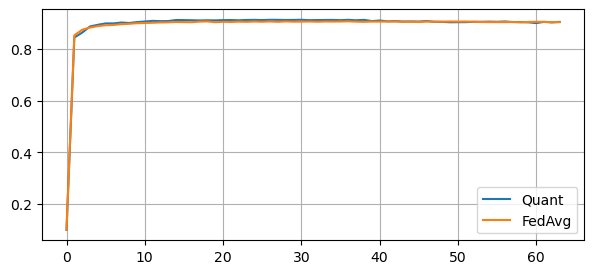

In [21]:
plt.figure(figsize=(7, 3))
plt.plot(global_acc_list )    
plt.plot(global_acc_list_FedAvg)
plt.legend(['Quant', 'FedAvg'])
plt.grid(True, which='major')   
print(np.mean(percentage[:,0:63]))
print(np.mean(Bits[:,0:63]))



In [17]:
quantized_diff_local_global_weight_test_me.shape
for i in range(6):
    print(i)
    print(quantized_diff_local_global_weight_test_me[i].shape)
    print('-------------------------------')

0
(3, 3, 3, 32)
-------------------------------
1
(32,)
-------------------------------
2
(5408, 64)
-------------------------------
3
(64,)
-------------------------------
4
(64, 10)
-------------------------------
5
(10,)
-------------------------------
